# Business Case - Delhivery

## Feature Engineering

### Problem Statement :

#### About Delhivery

Delhivery is the largest and fastest-growing fully integrated player in India by revenue in Fiscal 2021. They aim to build the operating system for commerce, through a combination of world-class infrastructure, logistics operations of the highest quality, and cutting-edge engineering and technology capabilities.

The Data team builds intelligence and capabilities using this data that helps them to widen the gap between the quality, efficiency, and profitability of their business versus their competitors.

#### How can you help here?

The company wants to understand and process the data coming out of data engineering pipelines:

• Clean, sanitize and manipulate data to get useful features out of raw fields

• Make sense out of the raw data and help the data science team to build forecasting models on it

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('delhivery_data.csv')

In [ ]:
df.shape

(144867, 24)

In [ ]:
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


In [ ]:
df.columns

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'is_cutoff', 'cutoff_factor',
       'cutoff_timestamp', 'actual_distance_to_destination', 'actual_time',
       'osrm_time', 'osrm_distance', 'factor', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'segment_factor'],
      dtype='object')

#### Column Profiling:

* data - tells whether the data is testing or training data
* trip_creation_time – Timestamp of trip creation
* route_schedule_uuid – Unique Id for a particular route schedule
* route_type – Transportation type
* FTL – Full Truck Load: FTL shipments get to the destination sooner, as the truck is making no other pickups or drop-offs along the way
* Carting: Handling system consisting of small vehicles (carts)
* trip_uuid - Unique ID given to a particular trip (A trip may include different source and destination centers)
* source_center - Source ID of trip origin
* source_name - Source Name of trip origin
* destination_cente – Destination ID
* destination_name – Destination Name
* od_start_time – Trip start time
* od_end_time – Trip end time
* start_scan_to_end_scan – Time taken to deliver from source to destination
* is_cutoff – Unknown field
* cutoff_factor – Unknown field
* cutoff_timestamp – Unknown field
* actual_distance_to_destination – Distance in Kms between source and destination warehouse
* actual_time – Actual time taken to complete the delivery (Cumulative)
* osrm_time – An open-source routing engine time calculator which computes the shortest path between points in a given map (Includes usual traffic, distance through major and minor roads) and gives the time (Cumulative)
* osrm_distance – An open-source routing engine which computes the shortest path between points in a given map (Includes usual traffic, distance through major and minor roads) (Cumulative)
* factor – Unknown field
* segment_actual_time – This is a segment time. Time taken by the subset of the package delivery
* segment_osrm_time – This is the OSRM segment time. Time taken by the subset of the package delivery
* segment_osrm_distance – This is the OSRM distance. Distance covered by subset of the package delivery
* segment_factor – Unknown field

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

### Missing Values

In [ ]:
df.isna().sum()

data                                0
trip_creation_time                  0
route_schedule_uuid                 0
route_type                          0
trip_uuid                           0
source_center                       0
source_name                       293
destination_center                  0
destination_name                  261
od_start_time                       0
od_end_time                         0
start_scan_to_end_scan              0
is_cutoff                           0
cutoff_factor                       0
cutoff_timestamp                    0
actual_distance_to_destination      0
actual_time                         0
osrm_time                           0
osrm_distance                       0
factor                              0
segment_actual_time                 0
segment_osrm_time                   0
segment_osrm_distance               0
segment_factor                      0
dtype: int64

source_name & destination_name has missing values (293 and 261 respectively)

#### Convert obj time to datetime

In [ ]:
df["trip_creation_time"] = pd.to_datetime(df["trip_creation_time"])
df["od_start_time"] = pd.to_datetime(df["od_start_time"])
df["od_end_time"] = pd.to_datetime(df["od_end_time"])

### Range of feature
- trip_creation_time

In [ ]:
df["trip_creation_time"].dt.month_name().value_counts()

September    127349
October       17518
Name: trip_creation_time, dtype: int64

In [ ]:
df["trip_creation_time"].dt.year.value_counts()

2018    144867
Name: trip_creation_time, dtype: int64

In [ ]:
df["trip_creation_time"].dt.day_name().value_counts()

Wednesday    26732
Thursday     20481
Friday       20242
Tuesday      19961
Saturday     19936
Monday       19645
Sunday       17870
Name: trip_creation_time, dtype: int64

#### Key Observations:
- Data ranges from September 2018 to October 2018
- Datapoints are well distributed across all the 7 week days

### Number of unique values for each feature

In [ ]:
df.nunique()

data                                   2
trip_creation_time                 14817
route_schedule_uuid                 1504
route_type                             2
trip_uuid                          14817
source_center                       1508
source_name                         1498
destination_center                  1481
destination_name                    1468
od_start_time                      26369
od_end_time                        26369
start_scan_to_end_scan              1915
is_cutoff                              2
cutoff_factor                        501
cutoff_timestamp                   93180
actual_distance_to_destination    144515
actual_time                         3182
osrm_time                           1531
osrm_distance                     138046
factor                             45641
segment_actual_time                  747
segment_osrm_time                    214
segment_osrm_distance             113799
segment_factor                      5675
dtype: int64

#### Observations :
- There are total 14817 different trips created
- Two different route and data types are present
- A total of 1508 source centers
- A total of 1498 source names
- A total of 1481 destination centers
- A total of 1468 destination names

In [ ]:
df.dtypes

data                                      object
trip_creation_time                datetime64[ns]
route_schedule_uuid                       object
route_type                                object
trip_uuid                                 object
source_center                             object
source_name                               object
destination_center                        object
destination_name                          object
od_start_time                     datetime64[ns]
od_end_time                       datetime64[ns]
start_scan_to_end_scan                   float64
is_cutoff                                   bool
cutoff_factor                              int64
cutoff_timestamp                          object
actual_distance_to_destination           float64
actual_time                              float64
osrm_time                                float64
osrm_distance                            float64
factor                                   float64
segment_actual_time 

In [ ]:
df.describe()

,start_scan_to_end_scan,cutoff_factor,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
count,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.00000,144867.000000
mean,961.262986,232.926567,234.073372,416.927527,213.868272,284.771297,2.120107,36.196111,18.507548,22.82902,2.218368
std,1037.012769,344.755577,344.990009,598.103621,308.011085,421.119294,1.715421,53.571158,14.775960,17.86066,4.847530
min,20.000000,9.000000,9.000045,9.000000,6.000000,9.008200,0.144000,-244.000000,0.000000,0.00000,-23.444444
25%,161.000000,22.000000,23.355874,51.000000,27.000000,29.914700,1.604264,20.000000,11.000000,12.07010,1.347826
50%,449.000000,66.000000,66.126571,132.000000,64.000000,78.525800,1.857143,29.000000,17.000000,23.51300,1.684211
75%,1634.000000,286.000000,286.708875,513.000000,257.000000,343.193250,2.213483,40.000000,22.000000,27.81325,2.250000
max,7898.000000,1927.000000,1927.447705,4532.000000,1686.000000,2326.199100,77.387097,3051.000000,1611.000000,2191.40370,574.250000


## Visual Analysis

### Univariate Continous Analysis

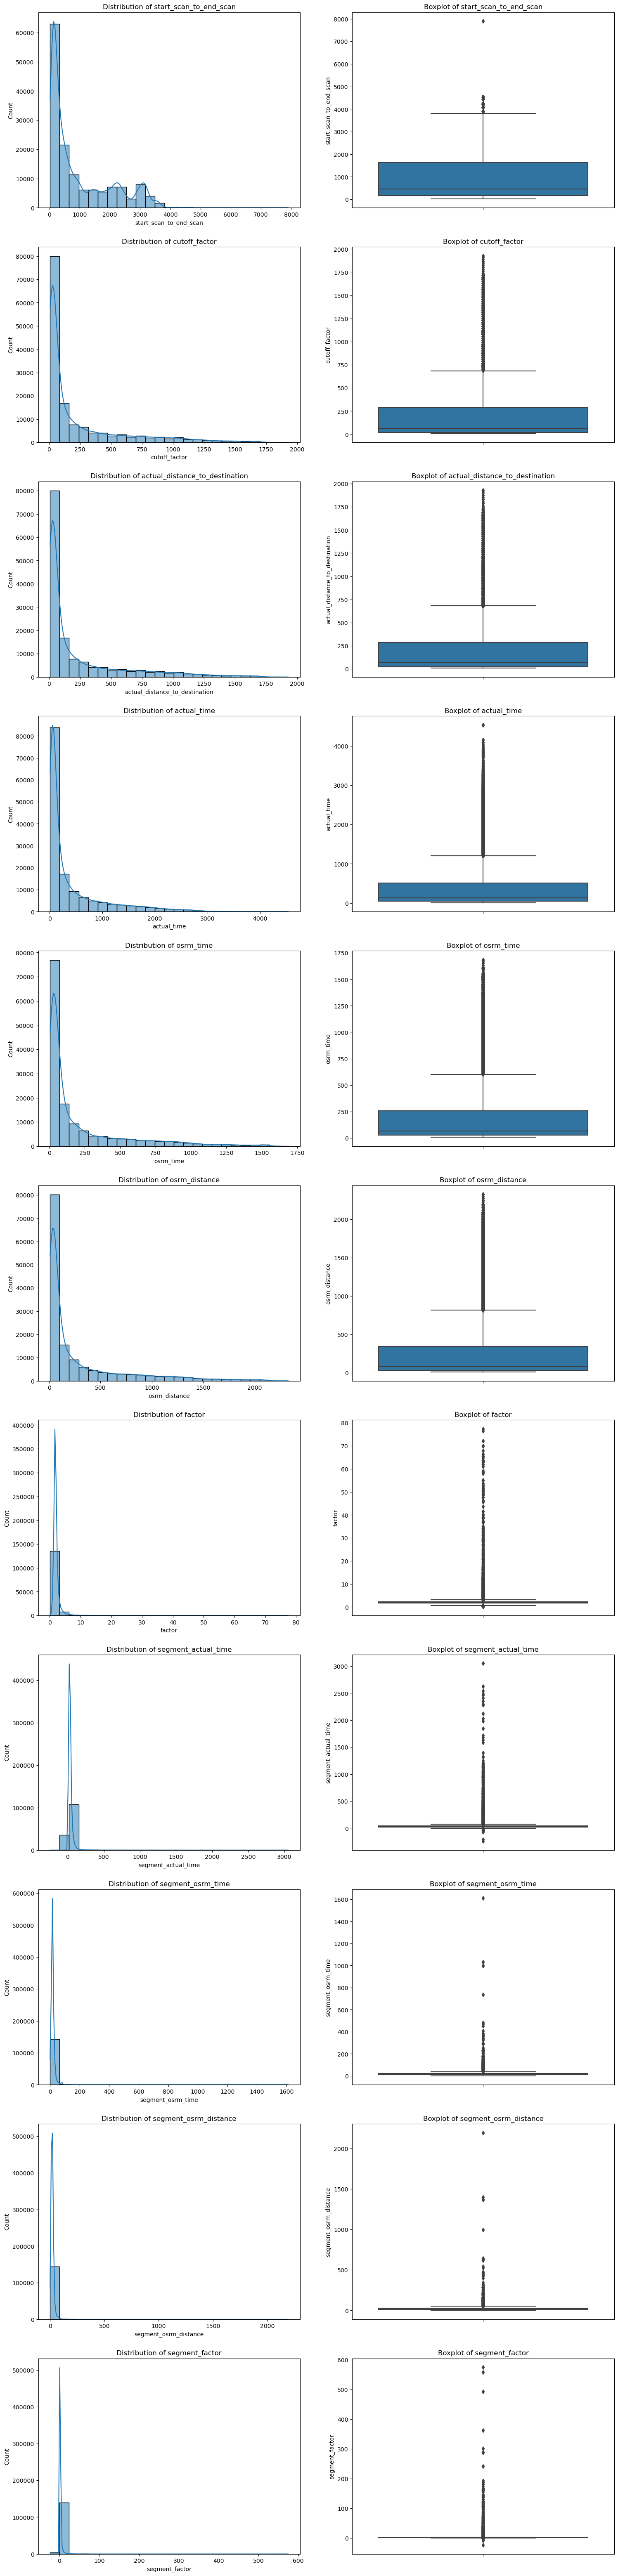

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

num_vars = df.select_dtypes(include=np.number).columns.tolist()

fig, ax = plt.subplots(nrows=11, ncols=2, figsize=(18, 80))

for i in range(len(num_vars)):

    sns.histplot(x=df[num_vars[i]], kde=True, bins = 25, ax=ax[i, 0])
    ax[i, 0].set_title(f"Distribution of {num_vars[i]}")

    sns.boxplot(y = df[num_vars[i]], ax=ax[i, 1], data=df)
    ax[i, 1].set_title(f"Boxplot of {num_vars[i]}")

plt.show()

In [ ]:
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


### Feature extraction


#### Extracting city, pincode and state from source and destination name

In [ ]:
df["source_city"] = df["source_name"].str.split(" ",n=1,expand=True)[0].str.split("_",n=1,expand=True)[0]
df["source_state"] = df["source_name"].str.split(" ",n=1,expand=True)[1].str.replace("(","").str.replace(")","")

df["destination_city"] = df["destination_name"].str.split(" ",n=1,expand=True)[0].str.split("_",n=1,expand=True)[0]
df["destination_state"] = df["destination_name"].str.split(" ",n=1,expand=True)[1].str.replace("(","").str.replace(")","")

df["source_pincode"] = df["source_center"].apply(lambda x : x[3:9] )
df["destination_pincode"] = df["destination_center"].apply(lambda x : x[3:9] )

/var/folders/g_/zvd9bhhs7x74gx11b8j2r9fh0000gn/T/ipykernel_57012/1650522065.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["source_state"] = df["source_name"].str.split(" ",n=1,expand=True)[1].str.replace("(","").str.replace(")","")
/var/folders/g_/zvd9bhhs7x74gx11b8j2r9fh0000gn/T/ipykernel_57012/1650522065.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["destination_state"] = df["destination_name"].str.split(" ",n=1,expand=True)[1].str.replace("(","").str.replace(")","")


In [ ]:
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor,source_city,source_state,destination_city,destination_state,source_pincode,destination_pincode
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,14.0,11.0,11.9653,1.272727,Anand,Gujarat,Khambhat,Gujarat,388121,388620
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,10.0,9.0,9.7590,1.111111,Anand,Gujarat,Khambhat,Gujarat,388121,388620
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,16.0,7.0,10.8152,2.285714,Anand,Gujarat,Khambhat,Gujarat,388121,388620
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,21.0,12.0,13.0224,1.750000,Anand,Gujarat,Khambhat,Gujarat,388121,388620
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,6.0,5.0,3.9153,1.200000,Anand,Gujarat,Khambhat,Gujarat,388121,388620


### Difference : od_start_time to od_end_time

In [ ]:
df["time_taken_btwn_odstart_and_od_end"] = ((df["od_end_time"]-df["od_start_time"])/pd.Timedelta(1,unit="hour"))

In [ ]:
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,segment_osrm_time,segment_osrm_distance,segment_factor,source_city,source_state,destination_city,destination_state,source_pincode,destination_pincode,time_taken_btwn_odstart_and_od_end
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,11.0,11.9653,1.272727,Anand,Gujarat,Khambhat,Gujarat,388121,388620,1.436894
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,9.0,9.7590,1.111111,Anand,Gujarat,Khambhat,Gujarat,388121,388620,1.436894
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,7.0,10.8152,2.285714,Anand,Gujarat,Khambhat,Gujarat,388121,388620,1.436894
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,12.0,13.0224,1.750000,Anand,Gujarat,Khambhat,Gujarat,388121,388620,1.436894
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,5.0,3.9153,1.200000,Anand,Gujarat,Khambhat,Gujarat,388121,388620,1.436894


### TIme based feature conversion to hours

In [ ]:
df["start_scan_to_end_scan"] = df["start_scan_to_end_scan"]/60
df["actual_time"] = df["actual_time"]/60
df["osrm_time"] = df["osrm_time"]/60
df["segment_actual_time"] = df["segment_actual_time"]/60
df["segment_osrm_time"] = df["segment_osrm_time"]/60

In [ ]:
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,segment_osrm_time,segment_osrm_distance,segment_factor,source_city,source_state,destination_city,destination_state,source_pincode,destination_pincode,time_taken_btwn_odstart_and_od_end
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,0.183333,11.9653,1.272727,Anand,Gujarat,Khambhat,Gujarat,388121,388620,1.436894
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,0.150000,9.7590,1.111111,Anand,Gujarat,Khambhat,Gujarat,388121,388620,1.436894
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,0.116667,10.8152,2.285714,Anand,Gujarat,Khambhat,Gujarat,388121,388620,1.436894
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,0.200000,13.0224,1.750000,Anand,Gujarat,Khambhat,Gujarat,388121,388620,1.436894
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,0.083333,3.9153,1.200000,Anand,Gujarat,Khambhat,Gujarat,388121,388620,1.436894


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 31 columns):
 #   Column                              Non-Null Count   Dtype         
---  ------                              --------------   -----         
 0   data                                144867 non-null  object        
 1   trip_creation_time                  144867 non-null  datetime64[ns]
 2   route_schedule_uuid                 144867 non-null  object        
 3   route_type                          144867 non-null  object        
 4   trip_uuid                           144867 non-null  object        
 5   source_center                       144867 non-null  object        
 6   source_name                         144574 non-null  object        
 7   destination_center                  144867 non-null  object        
 8   destination_name                    144606 non-null  object        
 9   od_start_time                       144867 non-null  datetime64[ns]
 10  od_end_t

### Data cleaning
- Updating feature values to make them uniform ex.Pashan maharashtra -> Maharashtra, DC Maharashtra -> Maharashtra


In [ ]:
df["source_state"] = df["source_state"].replace({"Goa Goa":"Goa",
                           "Layout PC Karnataka":"Karnataka",
                           "Vadgaon Sheri DPC Maharashtra":"Maharashtra",
                           "Pashan DPC Maharashtra":"Maharashtra",
                           "City Madhya Pradesh":"Madhya Pradesh",
                           "02_DPC Uttar Pradesh":"Uttar Pradesh",
                           "Nagar_DC Rajasthan":"Rajasthan",
                           "Alipore_DPC West Bengal":"West Bengal",
                            "Mandakni Madhya Pradesh":"Madhya Pradesh",
                            "West _Dc Maharashtra":"Maharashtra",
                            "DC Rajasthan":"Rajasthan",
                            "MP Nagar Madhya Pradesh":"Madhya Pradesh",
                            "Antop Hill Maharashtra":"Maharashtra",
                            "Avenue_DPC West Bengal":"West Bengal",
                            "Nagar Uttar Pradesh":"Uttar Pradesh",
                            "Balaji Nagar Maharashtra":"Maharashtra",
                            "Kothanur_L Karnataka":"Karnataka",
                            "Rahatani DPC Maharashtra":"Maharashtra",
                            "Mahim Maharashtra":"Maharashtra",
                            "DC Maharashtra":"Maharashtra",
                            "_NAD Andhra Pradesh":"Andhra Pradesh",
                                                       })

df["destination_state"] = df["destination_state"].replace({"Goa Goa":"Goa",
                           "Layout PC Karnataka":"Karnataka",
                           "Vadgaon Sheri DPC Maharashtra":"Maharashtra",
                           "Pashan DPC Maharashtra":"Maharashtra",
                           "City Madhya Pradesh":"Madhya Pradesh",
                           "02_DPC Uttar Pradesh":"Uttar Pradesh",
                           "Nagar_DC Rajasthan":"Rajasthan",
                           "Alipore_DPC West Bengal":"West Bengal",
                            "Mandakni Madhya Pradesh":"Madhya Pradesh",
                            "West _Dc Maharashtra":"Maharashtra",
                            "DC Rajasthan":"Rajasthan",
                            "MP Nagar Madhya Pradesh":"Madhya Pradesh",
                            "Antop Hill Maharashtra":"Maharashtra",
                            "Avenue_DPC West Bengal":"West Bengal",
                            "Nagar Uttar Pradesh":"Uttar Pradesh",
                            "Balaji Nagar Maharashtra":"Maharashtra",
                            "Kothanur_L Karnataka":"Karnataka",
                            "Rahatani DPC Maharashtra":"Maharashtra",
                            "Mahim Maharashtra":"Maharashtra",
                            "DC Maharashtra":"Maharashtra",
                            "_NAD Andhra Pradesh":"Andhra Pradesh",
                           "Delhi Delhi":"Delhi",
                           "West_Dc Maharashtra":"Maharashtra",
                           "Hub Maharashtra":"Maharashtra"
                                                       })

In [ ]:
df["destination_city"].replace({
    "del":"Delhi"
},inplace=True)
df["source_city"].replace({
    "del":"Delhi"
},inplace=True)

df["source_city"].replace({
    "Bangalore":"Bengaluru"
        },inplace=True)
df["destination_city"].replace({
    "Bangalore":"Bengaluru"
        },inplace=True)
df["destination_city"].replace({
    "AMD":"Ahmedabad"
        },inplace=True)
df["destination_city"].replace({
    "Amdavad":"Ahmedabad"
        },inplace=True)
df["source_city"].replace({
    "AMD":"Ahmedabad"
        },inplace=True)
df["source_city"].replace({
    "Amdavad":"Ahmedabad"
        },inplace=True)

### Combine City, State from source_city, source_state

In [ ]:
df["source_city_state"] = df["source_city"] + " " + df["source_state"]
df["destination_city_state"] = df["destination_city"] + " " + df["destination_state"]

In [ ]:
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,segment_factor,source_city,source_state,destination_city,destination_state,source_pincode,destination_pincode,time_taken_btwn_odstart_and_od_end,source_city_state,destination_city_state
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,1.272727,Anand,Gujarat,Khambhat,Gujarat,388121,388620,1.436894,Anand Gujarat,Khambhat Gujarat
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,1.111111,Anand,Gujarat,Khambhat,Gujarat,388121,388620,1.436894,Anand Gujarat,Khambhat Gujarat
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2.285714,Anand,Gujarat,Khambhat,Gujarat,388121,388620,1.436894,Anand Gujarat,Khambhat Gujarat
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,1.750000,Anand,Gujarat,Khambhat,Gujarat,388121,388620,1.436894,Anand Gujarat,Khambhat Gujarat
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,1.200000,Anand,Gujarat,Khambhat,Gujarat,388121,388620,1.436894,Anand Gujarat,Khambhat Gujarat


In [ ]:
df["source_city_state"].nunique()

1249

In [ ]:
df["destination_city_state"].nunique()

1242

In [ ]:
df["source_state"].nunique()

33

In [ ]:
df["destination_state"].nunique()

32

### Observations:
- Company delivers in 1242 different cities across country from 1249 different source destinations
- Company network spans across more than 32 different for source and destination

In [ ]:
delhivery_data = df.copy()

In [ ]:
delhivery_data.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,segment_factor,source_city,source_state,destination_city,destination_state,source_pincode,destination_pincode,time_taken_btwn_odstart_and_od_end,source_city_state,destination_city_state
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,1.272727,Anand,Gujarat,Khambhat,Gujarat,388121,388620,1.436894,Anand Gujarat,Khambhat Gujarat
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,1.111111,Anand,Gujarat,Khambhat,Gujarat,388121,388620,1.436894,Anand Gujarat,Khambhat Gujarat
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2.285714,Anand,Gujarat,Khambhat,Gujarat,388121,388620,1.436894,Anand Gujarat,Khambhat Gujarat
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,1.750000,Anand,Gujarat,Khambhat,Gujarat,388121,388620,1.436894,Anand Gujarat,Khambhat Gujarat
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,1.200000,Anand,Gujarat,Khambhat,Gujarat,388121,388620,1.436894,Anand Gujarat,Khambhat Gujarat


In [ ]:
delhivery_data.shape

(144867, 33)

In [ ]:
delhivery_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 33 columns):
 #   Column                              Non-Null Count   Dtype         
---  ------                              --------------   -----         
 0   data                                144867 non-null  object        
 1   trip_creation_time                  144867 non-null  datetime64[ns]
 2   route_schedule_uuid                 144867 non-null  object        
 3   route_type                          144867 non-null  object        
 4   trip_uuid                           144867 non-null  object        
 5   source_center                       144867 non-null  object        
 6   source_name                         144574 non-null  object        
 7   destination_center                  144867 non-null  object        
 8   destination_name                    144606 non-null  object        
 9   od_start_time                       144867 non-null  datetime64[ns]
 10  od_end_t

In [ ]:
delhivery_data.describe()

,start_scan_to_end_scan,cutoff_factor,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor,time_taken_btwn_odstart_and_od_end
count,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.00000,144867.000000,144867.000000
mean,16.021050,232.926567,234.073372,6.948792,3.564471,284.771297,2.120107,0.603269,0.308459,22.82902,2.218368,16.029317
std,17.283546,344.755577,344.990009,9.968394,5.133518,421.119294,1.715421,0.892853,0.246266,17.86066,4.847530,17.283544
min,0.333333,9.000000,9.000045,0.150000,0.100000,9.008200,0.144000,-4.066667,0.000000,0.00000,-23.444444,0.345047
25%,2.683333,22.000000,23.355874,0.850000,0.450000,29.914700,1.604264,0.333333,0.183333,12.07010,1.347826,2.691688
50%,7.483333,66.000000,66.126571,2.200000,1.066667,78.525800,1.857143,0.483333,0.283333,23.51300,1.684211,7.487276
75%,27.233333,286.000000,286.708875,8.550000,4.283333,343.193250,2.213483,0.666667,0.366667,27.81325,2.250000,27.249169
max,131.633333,1927.000000,1927.447705,75.533333,28.100000,2326.199100,77.387097,50.850000,26.850000,2191.40370,574.250000,131.642533


In [ ]:
# Compare the difference between Point a. and start_scan_to_end_scan

actual_time = delhivery_data.groupby(["trip_uuid",
              "start_scan_to_end_scan"])["actual_time"].max().reset_index().groupby("trip_uuid")["actual_time"].sum().reset_index()

actual_time

,trip_uuid,actual_time
0,trip-153671041653548748,26.033333
1,trip-153671042288605164,2.383333
2,trip-153671043369099517,55.783333
3,trip-153671046011330457,0.983333
4,trip-153671052974046625,5.683333
...,...,...
14812,trip-153861095625827784,1.383333
14813,trip-153861104386292051,0.350000
14814,trip-153861106442901555,4.700000
14815,trip-153861115439069069,4.400000


In [ ]:
# OSRM time aggregated value

segment_osrm_time = delhivery_data[["trip_uuid","segment_osrm_time"]].groupby("trip_uuid")["segment_osrm_time"].sum().reset_index()
segment_osrm_time

,trip_uuid,segment_osrm_time
0,trip-153671041653548748,16.800000
1,trip-153671042288605164,1.083333
2,trip-153671043369099517,32.350000
3,trip-153671046011330457,0.266667
4,trip-153671052974046625,1.916667
...,...,...
14812,trip-153861095625827784,1.033333
14813,trip-153861104386292051,0.183333
14814,trip-153861106442901555,1.466667
14815,trip-153861115439069069,3.683333


In [ ]:
segment_actual_time = delhivery_data.groupby("trip_uuid")["segment_actual_time"].sum().reset_index()
segment_actual_time

,trip_uuid,segment_actual_time
0,trip-153671041653548748,25.800000
1,trip-153671042288605164,2.350000
2,trip-153671043369099517,55.133333
3,trip-153671046011330457,0.983333
4,trip-153671052974046625,5.666667
...,...,...
14812,trip-153861095625827784,1.366667
14813,trip-153861104386292051,0.350000
14814,trip-153861106442901555,4.683333
14815,trip-153861115439069069,4.300000


In [ ]:
# Calculate OSRM time

osrm_time = delhivery_data.groupby(["trip_uuid",
              "start_scan_to_end_scan"])["osrm_time"].max().reset_index().groupby("trip_uuid")["osrm_time"].sum().reset_index()
osrm_time

,trip_uuid,osrm_time
0,trip-153671041653548748,12.383333
1,trip-153671042288605164,1.133333
2,trip-153671043369099517,29.016667
3,trip-153671046011330457,0.250000
4,trip-153671052974046625,1.950000
...,...,...
14812,trip-153861095625827784,1.033333
14813,trip-153861104386292051,0.200000
14814,trip-153861106442901555,0.900000
14815,trip-153861115439069069,3.066667


In [ ]:
# Calculate the time taken between od_start_time and od_end_time
time_taken_btwn_odstart_and_od_end = delhivery_data.groupby("trip_uuid")["time_taken_btwn_odstart_and_od_end"].unique().reset_index()
time_taken_btwn_odstart_and_od_end

,trip_uuid,time_taken_btwn_odstart_and_od_end
0,trip-153671041653548748,"[16.65842298, 21.0100736875]"
1,trip-153671042288605164,"[2.0463247669444447, 0.9805397955555556]"
2,trip-153671043369099517,"[51.662059856388886, 13.910648811388889]"
3,trip-153671046011330457,[1.6749155866666667]
4,trip-153671052974046625,"[2.5335485744444446, 1.3423885633333332, 8.096..."
...,...,...
14812,trip-153861095625827784,"[2.546464057777778, 1.7540180775]"
14813,trip-153861104386292051,[1.0098420219444444]
14814,trip-153861106442901555,"[2.895179575833333, 4.1401515375]"
14815,trip-153861115439069069,"[1.7609491794444445, 0.7362400538888889, 1.035..."


In [ ]:
time_taken_btwn_odstart_and_od_end["time_taken_btwn_odstart_and_od_end"] = time_taken_btwn_odstart_and_od_end["time_taken_btwn_odstart_and_od_end"].apply(sum)
time_taken_btwn_odstart_and_od_end["time_taken_btwn_odstart_and_od_end"]

0        37.668497
1         3.026865
2        65.572709
3         1.674916
4        11.972484
           ...    
14812     4.300482
14813     1.009842
14814     7.035331
14815     5.808548
14816     5.906793
Name: time_taken_btwn_odstart_and_od_end, Length: 14817, dtype: float64

In [ ]:
# start_scan to end_scan time

start_scan_to_end_scan = ((delhivery_data.groupby("trip_uuid")["start_scan_to_end_scan"].unique())).reset_index()
start_scan_to_end_scan

,trip_uuid,start_scan_to_end_scan
0,trip-153671041653548748,"[16.65, 21.0]"
1,trip-153671042288605164,"[2.033333333333333, 0.9666666666666667]"
2,trip-153671043369099517,"[51.65, 13.9]"
3,trip-153671046011330457,[1.6666666666666667]
4,trip-153671052974046625,"[2.533333333333333, 1.3333333333333333, 8.0833..."
...,...,...
14812,trip-153861095625827784,"[2.533333333333333, 1.75]"
14813,trip-153861104386292051,[1.0]
14814,trip-153861106442901555,"[2.8833333333333333, 4.133333333333334]"
14815,trip-153861115439069069,"[1.75, 0.7333333333333333, 1.0333333333333334,..."


In [ ]:
start_scan_to_end_scan["start_scan_to_end_scan"] = start_scan_to_end_scan["start_scan_to_end_scan"].apply(sum)
start_scan_to_end_scan["start_scan_to_end_scan"]

0        37.650000
1         3.000000
2        65.550000
3         1.666667
4        11.950000
           ...    
14812     4.283333
14813     1.000000
14814     7.016667
14815     5.783333
14816     5.883333
Name: start_scan_to_end_scan, Length: 14817, dtype: float64

In [ ]:
osrm_distance = delhivery_data.groupby(["trip_uuid",
              "start_scan_to_end_scan"])["osrm_distance"].max().reset_index().groupby("trip_uuid")["osrm_distance"].sum().reset_index()

osrm_distance

,trip_uuid,osrm_distance
0,trip-153671041653548748,991.3523
1,trip-153671042288605164,85.1110
2,trip-153671043369099517,2372.0852
3,trip-153671046011330457,19.6800
4,trip-153671052974046625,146.7918
...,...,...
14812,trip-153861095625827784,73.4630
14813,trip-153861104386292051,16.0882
14814,trip-153861106442901555,63.2841
14815,trip-153861115439069069,177.6635


In [ ]:
actual_distance_to_destination = delhivery_data.groupby(["trip_uuid",
              "start_scan_to_end_scan"])["actual_distance_to_destination"].max().reset_index().groupby("trip_uuid")["actual_distance_to_destination"].sum().reset_index()

actual_distance_to_destination

,trip_uuid,actual_distance_to_destination
0,trip-153671041653548748,824.732854
1,trip-153671042288605164,73.186911
2,trip-153671043369099517,1932.273969
3,trip-153671046011330457,17.175274
4,trip-153671052974046625,127.448500
...,...,...
14812,trip-153861095625827784,57.762332
14813,trip-153861104386292051,15.513784
14814,trip-153861106442901555,38.684839
14815,trip-153861115439069069,134.723836


In [ ]:
# Segment OSRM distance

segment_osrm_distance = delhivery_data[["trip_uuid",
                              "segment_osrm_distance"]].groupby("trip_uuid")["segment_osrm_distance"].sum().reset_index()

segment_osrm_distance

,trip_uuid,segment_osrm_distance
0,trip-153671041653548748,1320.4733
1,trip-153671042288605164,84.1894
2,trip-153671043369099517,2545.2678
3,trip-153671046011330457,19.8766
4,trip-153671052974046625,146.7919
...,...,...
14812,trip-153861095625827784,64.8551
14813,trip-153861104386292051,16.0883
14814,trip-153861106442901555,104.8866
14815,trip-153861115439069069,223.5324


## Hypothesis testing

## 1. Analysing TimeTaken Between OdStart and OdEnd time & StartScanToEndScan :

H0: Mean of time taken betweenn trip end ans start time = Mean of start and end scan time
Ha: Mean of time taken betweenn trip end ans start time != Mean of start and end scan time

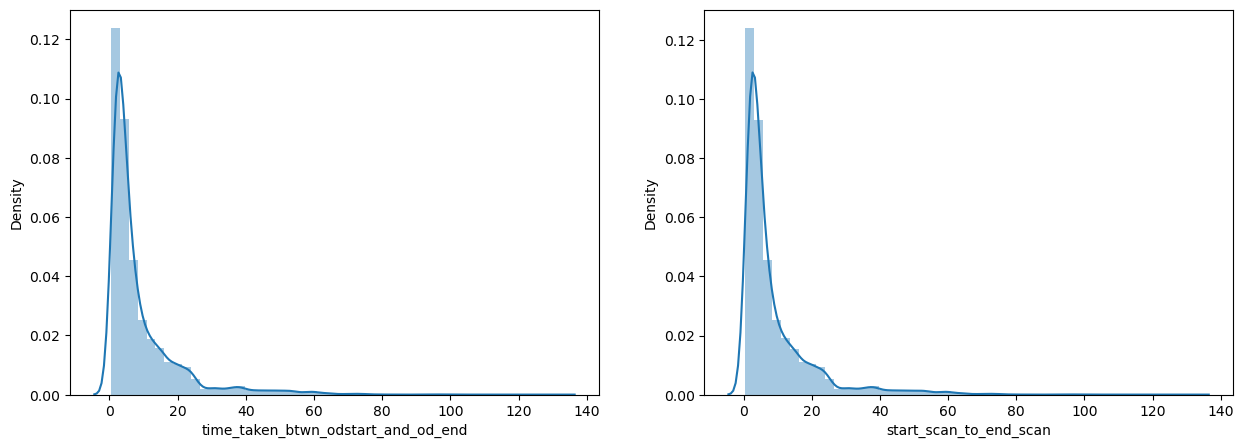

In [ ]:
import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(15,5))
plt.subplot(121)
sns.distplot((time_taken_btwn_odstart_and_od_end["time_taken_btwn_odstart_and_od_end"]))
plt.subplot(122)
sns.distplot((start_scan_to_end_scan["start_scan_to_end_scan"]))

plt.show()

In [ ]:
# KS Test to check the similarity of distribution of these two

from scipy import stats

ks_test, p_value = stats.ks_2samp(time_taken_btwn_odstart_and_od_end["time_taken_btwn_odstart_and_od_end"]
               ,start_scan_to_end_scan["start_scan_to_end_scan"])

# Ho: The distribution are similar
# Ha: The disbutions are different

if p_value < 0.05:
    print("Reject Ho: The distribution are different.")
else :
    print("Fail to reject Ho: The distribution is same.")

Fail to reject Ho: The distribution is same.


In [ ]:
time_taken_btwn_odstart_and_od_end["time_taken_btwn_odstart_and_od_end"].mean(),time_taken_btwn_odstart_and_od_end["time_taken_btwn_odstart_and_od_end"].std()

(8.861857235305113, 10.981665759990623)

In [ ]:
start_scan_to_end_scan["start_scan_to_end_scan"].mean(),start_scan_to_end_scan["start_scan_to_end_scan"].std()

(8.835777597804324, 10.97628639143973)

variance and means both are closly similar for scan time and trip start and end time taken

## 2. Analysing Actual Time taken to complete the delivery & start-scan-end-scan

H0: Mean of start and end scan time <= Mean of Actual time taken to complete delivery

Ha: Mean of start and end scan time > Mean of Actual time taken to complete delivery

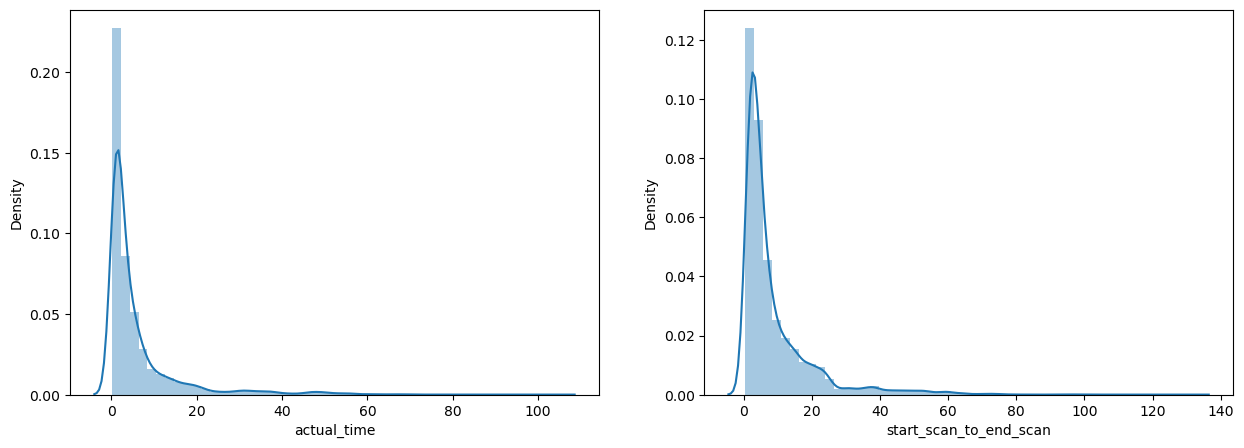

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.distplot((actual_time["actual_time"]))
plt.subplot(122)
sns.distplot((start_scan_to_end_scan["start_scan_to_end_scan"]))

plt.show()

In [ ]:
stats.ks_2samp(actual_time["actual_time"],start_scan_to_end_scan["start_scan_to_end_scan"])

KstestResult(statistic=0.27387460349598436, pvalue=0.0, statistic_location=1.8499999999999999, statistic_sign=1)

In [ ]:
for i in range(5):
    print(stats.ttest_ind((actual_time["actual_time"].sample(3000))
                ,(start_scan_to_end_scan["start_scan_to_end_scan"].sample(3000)),alternative="less"))

TtestResult(statistic=-10.021908980058695, pvalue=9.33135026220539e-24, df=5998.0)
TtestResult(statistic=-10.326081429733916, pvalue=4.3274841746542045e-25, df=5998.0)
TtestResult(statistic=-11.4302577920513, pvalue=3.0086208136822574e-30, df=5998.0)
TtestResult(statistic=-9.980765984789935, pvalue=1.4042422368153353e-23, df=5998.0)
TtestResult(statistic=-11.612847552157728, pvalue=3.7834193589572045e-31, df=5998.0)


In [ ]:
actual_time["actual_time"].mean(),actual_time["actual_time"].std()

(5.945176711435065, 9.35554782297388)

In [ ]:
start_scan_to_end_scan["start_scan_to_end_scan"].mean(),start_scan_to_end_scan["start_scan_to_end_scan"].std()

(8.835777597804324, 10.97628639143973)

In [ ]:
# Since p value is higher than 0.05, H0 can not be rejected.

## 3. Analysing Actual Time & TimeTaken between start and end trip time.

H0: Mean of Actual time taken to complete delivery = Mean of time taken betweenn trip end and start time

Ha: Mean of Actual time taken to complete delivery != Mean of time taken betweenn trip end and start time

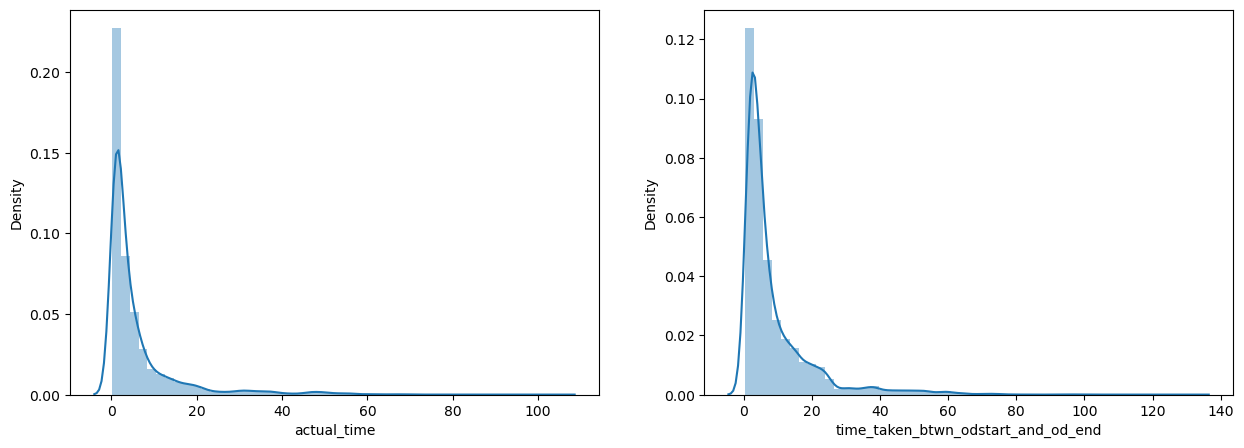

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.distplot((actual_time["actual_time"]))
plt.subplot(122)
sns.distplot((time_taken_btwn_odstart_and_od_end["time_taken_btwn_odstart_and_od_end"]))

plt.show()

In [ ]:
stats.ks_2samp(actual_time["actual_time"],time_taken_btwn_odstart_and_od_end["time_taken_btwn_odstart_and_od_end"])

KstestResult(statistic=0.2765067152594992, pvalue=0.0, statistic_location=1.8333333333333335, statistic_sign=1)

In [ ]:
for i in range(5):
    print(stats.ttest_ind((actual_time["actual_time"].sample(1000))
                ,(time_taken_btwn_odstart_and_od_end["time_taken_btwn_odstart_and_od_end"].sample(1000))))

TtestResult(statistic=-7.538280562950442, pvalue=7.178894676701577e-14, df=1998.0)
TtestResult(statistic=-4.645624123517153, pvalue=3.6114953535020166e-06, df=1998.0)
TtestResult(statistic=-5.309813104450289, pvalue=1.2194122892422407e-07, df=1998.0)
TtestResult(statistic=-4.98580349387588, pvalue=6.702956746641337e-07, df=1998.0)
TtestResult(statistic=-6.227505776382338, pvalue=5.761322269971488e-10, df=1998.0)


from above kstest of distribution and two sample ttest , we can conclude that population mean
Actual time taken to complete delivery and population mean time_taken_btwn_od_start_and_od_end are also not same.

## 4. Analysing Actual Time taken to complete delivery from source to destination hub & OSRM measured time :

H0: Mean of OSRM time >= Mean of Actual time taken to complete delivery

Ha: Mean of OSRM time < Mean of Actual time taken to complete delivery

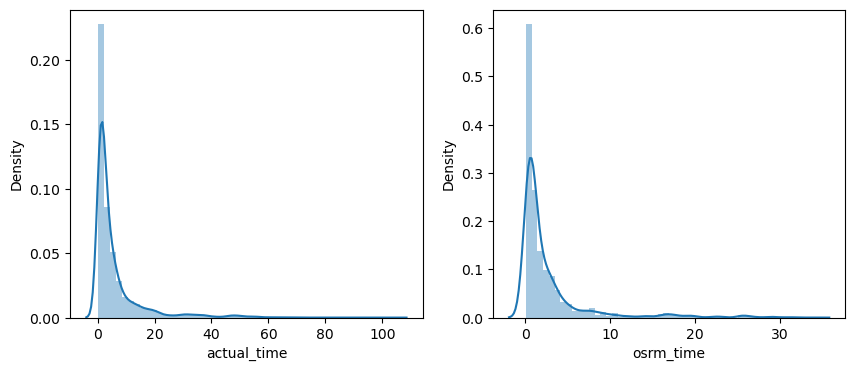

In [ ]:
plt.figure(figsize=(10,4))
plt.subplot(121)
sns.distplot(((actual_time["actual_time"])))
plt.subplot(122)
sns.distplot(((osrm_time["osrm_time"])))

plt.show()

In [ ]:
stats.ks_2samp(actual_time["actual_time"],
               osrm_time["osrm_time"])

KstestResult(statistic=0.2945265573327934, pvalue=0.0, statistic_location=0.6833333333333333, statistic_sign=-1)

In [ ]:
for i in range(5):
    print(stats.ttest_ind(actual_time["actual_time"].sample(5000),
               osrm_time["osrm_time"].sample(5000),alternative='greater'))

TtestResult(statistic=22.141625235005574, pvalue=2.1685887771530743e-106, df=9998.0)
TtestResult(statistic=23.019675593420963, pvalue=1.3409331566912555e-114, df=9998.0)
TtestResult(statistic=22.261082502602502, pvalue=1.7229690666465175e-107, df=9998.0)
TtestResult(statistic=22.679402466973592, pvalue=2.200980711656474e-111, df=9998.0)
TtestResult(statistic=22.19760424408309, pvalue=6.628520162617314e-107, df=9998.0)


In [ ]:
actual_time["actual_time"].mean(), actual_time["actual_time"].std()

(5.945176711435065, 9.35554782297388)

In [ ]:
osrm_time["osrm_time"].mean(), osrm_time["osrm_time"].std()

(2.6973138962003107, 4.537654251845703)

- from two sample ttest can conclude , that population mean actual time taken to complete delivert from source to warehouse and orsm estimate mean time for population are not same.

- actual time is higher than the osrm estimated time for delivery.

## 5. Analysing Actual Time taken to complete delivery from source to destination hub & Segment Actual Time :

H0: Actual time = segment actual time

Ha: Actual time != segment actual time


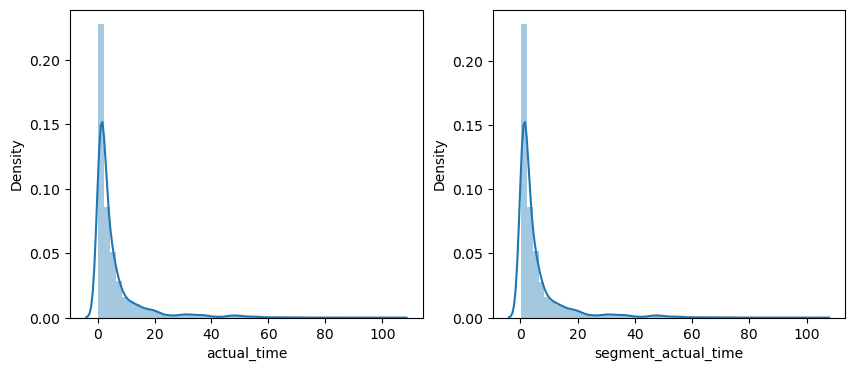

In [ ]:
plt.figure(figsize=(10,4))
plt.subplot(121)
sns.distplot(((actual_time["actual_time"])))
plt.subplot(122)
sns.distplot(((segment_actual_time["segment_actual_time"])))

plt.show()

In [ ]:
for i in range(7):
    print(stats.ttest_ind((actual_time["actual_time"].sample(3000)),
                (segment_actual_time["segment_actual_time"].sample(3000))))

TtestResult(statistic=-0.7668804274495723, pvalue=0.4431827945459782, df=5998.0)
TtestResult(statistic=0.2556072769294054, pvalue=0.7982628635371427, df=5998.0)
TtestResult(statistic=0.36239527276077294, pvalue=0.7170694394091051, df=5998.0)
TtestResult(statistic=-0.3961818033879329, pvalue=0.6919850068381679, df=5998.0)
TtestResult(statistic=-0.8027763690030723, pvalue=0.4221358107757345, df=5998.0)
TtestResult(statistic=0.37632752903825334, pvalue=0.7066867264255794, df=5998.0)
TtestResult(statistic=-1.9816649103775041, pvalue=0.047562337693991076, df=5998.0)


In [ ]:
actual_time["actual_time"].mean(),actual_time["actual_time"].std()

(5.945176711435065, 9.35554782297388)

In [ ]:
segment_actual_time["segment_actual_time"].mean(),segment_actual_time["segment_actual_time"].std()

(5.8982047647971925, 9.270799413152762)

 - from two sample ttest , we can conclude that

- Population average for Actual Time taken to complete delivery trip and segment actual time are same.

## Analysing and Visulizing OSRM Estimated distance and Segment-osrm-distance :

H0 : Segment OSRM distance <= OSRM distance

Ha : Segment OSRM distance > OSRM distance

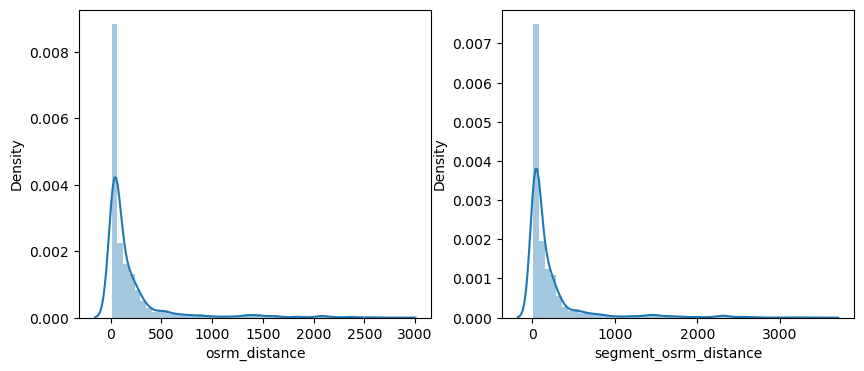

In [ ]:
plt.figure(figsize=(10,4))
plt.subplot(121)
sns.distplot(((osrm_distance["osrm_distance"])))
plt.subplot(122)
sns.distplot(((segment_osrm_distance["segment_osrm_distance"])))

plt.show()

In [ ]:
stats.ks_2samp(osrm_distance["osrm_distance"],segment_osrm_distance["segment_osrm_distance"])

KstestResult(statistic=0.03948167645272321, pvalue=1.8042208791084262e-10, statistic_location=50.2941, statistic_sign=1)

In [ ]:
for i in range(5):
    print(stats.ttest_ind(osrm_distance["osrm_distance"].sample(5000),
               segment_osrm_distance["segment_osrm_distance"].sample(5000),alternative="less"))

TtestResult(statistic=-2.674415075190282, pvalue=0.0037490745798051985, df=9998.0)
TtestResult(statistic=-3.0285951276843965, pvalue=0.0012316028557494338, df=9998.0)
TtestResult(statistic=-1.1007731763892785, pvalue=0.1355109449089296, df=9998.0)
TtestResult(statistic=-2.1386381778685766, pvalue=0.016244571841443758, df=9998.0)
TtestResult(statistic=-3.175633676607402, pvalue=0.0007498180282488411, df=9998.0)


In [ ]:
osrm_distance["osrm_distance"].mean(),osrm_distance["osrm_distance"].std()

(204.83672531551593, 370.74927471335496)

In [ ]:
segment_osrm_distance["segment_osrm_distance"].mean(), segment_osrm_distance["segment_osrm_distance"].std()

(223.20116128771005, 416.6283742907418)

- from KS test , we can conclude the distributions of segment osrm distance and osrm distnace are not same

- from two sample one sided ttest, we can conclude: Average of osrm distance for population is less than average of segment osrm distnace

## Outliers

In [ ]:
distances = segment_osrm_distance.merge(actual_distance_to_destination.merge(osrm_distance,
                                                                             on="trip_uuid"),
                                                                            on="trip_uuid")
time = segment_osrm_time.merge(osrm_time.merge(segment_actual_time.merge(actual_time.merge(time_taken_btwn_odstart_and_od_end.merge(start_scan_to_end_scan,
                                         on="trip_uuid",
                                         ),on="trip_uuid"),on="trip_uuid"),on="trip_uuid"),on="trip_uuid")

In [ ]:
Time_Distance = time.merge(distances,on="trip_uuid")

In [ ]:
Time_Distance.head()

,trip_uuid,segment_osrm_time,osrm_time,segment_actual_time,actual_time,time_taken_btwn_odstart_and_od_end,start_scan_to_end_scan,segment_osrm_distance,actual_distance_to_destination,osrm_distance
0,trip-153671041653548748,16.800000,12.383333,25.800000,26.033333,37.668497,37.650000,1320.4733,824.732854,991.3523
1,trip-153671042288605164,1.083333,1.133333,2.350000,2.383333,3.026865,3.000000,84.1894,73.186911,85.1110
2,trip-153671043369099517,32.350000,29.016667,55.133333,55.783333,65.572709,65.550000,2545.2678,1932.273969,2372.0852
3,trip-153671046011330457,0.266667,0.250000,0.983333,0.983333,1.674916,1.666667,19.8766,17.175274,19.6800
4,trip-153671052974046625,1.916667,1.950000,5.666667,5.683333,11.972484,11.950000,146.7919,127.448500,146.7918


In [ ]:
Time_Distance.shape

(14817, 10)

In [ ]:
city = delhivery_data.groupby("trip_uuid")[["source_city",
                                  "destination_city"]].aggregate({
        "source_city":pd.unique,
    "destination_city":pd.unique,
})

state = delhivery_data.groupby("trip_uuid")[["source_state",
                                   "destination_state"]].aggregate({
        "source_state":pd.unique,
    "destination_state":pd.unique,
})

city_state = delhivery_data.groupby("trip_uuid")[["source_city_state",
                                        "destination_city_state"]].aggregate({
        "source_city_state":pd.unique,
    "destination_city_state":pd.unique,
})

locations = city.merge(city_state.merge(state,on="trip_uuid"
                            ,how="outer"),
           on="trip_uuid",
           how="outer")

In [ ]:
locations.head()

,source_city,destination_city,source_city_state,destination_city_state,source_state,destination_state
trip_uuid,,,,,,
trip-153671041653548748,"[Bhopal, Kanpur]","[Kanpur, Gurgaon]","[Bhopal Madhya Pradesh, Kanpur Uttar Pradesh]","[Kanpur Uttar Pradesh, Gurgaon Haryana]","[Madhya Pradesh, Uttar Pradesh]","[Uttar Pradesh, Haryana]"
trip-153671042288605164,"[Tumkur, Doddablpur]","[Doddablpur, Chikblapur]","[Tumkur Karnataka, Doddablpur Karnataka]","[Doddablpur Karnataka, Chikblapur Karnataka]",[Karnataka],[Karnataka]
trip-153671043369099517,"[Bengaluru, Gurgaon]","[Gurgaon, Chandigarh]","[Bengaluru Karnataka, Gurgaon Haryana]","[Gurgaon Haryana, Chandigarh Punjab]","[Karnataka, Haryana]","[Haryana, Punjab]"
trip-153671046011330457,[Mumbai],[Mumbai],[Mumbai Hub Maharashtra],[Mumbai Maharashtra],[Hub Maharashtra],[Maharashtra]
trip-153671052974046625,"[Bellary, Hospet, Sandur]","[Hospet, Sandur, Bellary]","[Bellary Karnataka, Hospet Karnataka, Sandur K...","[Hospet Karnataka, Sandur Karnataka, Bellary K...",[Karnataka],[Karnataka]


In [ ]:
route_type = delhivery_data.groupby("trip_uuid")["route_type"].unique().reset_index()

Merged = route_type.merge(locations.merge(Time_Distance,on="trip_uuid",
           how="outer"),
                 on="trip_uuid",
           how="outer"
                )

trip_records = Merged.copy()

In [ ]:
trip_records["route_type"] = trip_records["route_type"].apply(lambda x:x[0])
route_to_merge = delhivery_data.groupby("trip_uuid")["route_schedule_uuid"].unique().reset_index()
trip_records = trip_records.merge(route_to_merge,on="trip_uuid",how="outer")
trip_records["route_schedule_uuid"] = trip_records["route_schedule_uuid"].apply(lambda x:x[0])
trip_records

,trip_uuid,route_type,source_city,destination_city,source_city_state,destination_city_state,source_state,destination_state,segment_osrm_time,osrm_time,segment_actual_time,actual_time,time_taken_btwn_odstart_and_od_end,start_scan_to_end_scan,segment_osrm_distance,actual_distance_to_destination,osrm_distance,route_schedule_uuid
0,trip-153671041653548748,F,"[Bhopal, Kanpur]","[Kanpur, Gurgaon]","[Bhopal Madhya Pradesh, Kanpur Uttar Pradesh]","[Kanpur Uttar Pradesh, Gurgaon Haryana]","[Madhya Pradesh, Uttar Pradesh]","[Uttar Pradesh, Haryana]",16.800000,12.383333,25.800000,26.033333,37.668497,37.650000,1320.4733,824.732854,991.3523,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...
1,trip-153671042288605164,C,"[Tumkur, Doddablpur]","[Doddablpur, Chikblapur]","[Tumkur Karnataka, Doddablpur Karnataka]","[Doddablpur Karnataka, Chikblapur Karnataka]",[Karnataka],[Karnataka],1.083333,1.133333,2.350000,2.383333,3.026865,3.000000,84.1894,73.186911,85.1110,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...
2,trip-153671043369099517,F,"[Bengaluru, Gurgaon]","[Gurgaon, Chandigarh]","[Bengaluru Karnataka, Gurgaon Haryana]","[Gurgaon Haryana, Chandigarh Punjab]","[Karnataka, Haryana]","[Haryana, Punjab]",32.350000,29.016667,55.133333,55.783333,65.572709,65.550000,2545.2678,1932.273969,2372.0852,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...
3,trip-153671046011330457,C,[Mumbai],[Mumbai],[Mumbai Hub Maharashtra],[Mumbai Maharashtra],[Hub Maharashtra],[Maharashtra],0.266667,0.250000,0.983333,0.983333,1.674916,1.666667,19.8766,17.175274,19.6800,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...
4,trip-153671052974046625,F,"[Bellary, Hospet, Sandur]","[Hospet, Sandur, Bellary]","[Bellary Karnataka, Hospet Karnataka, Sandur K...","[Hospet Karnataka, Sandur Karnataka, Bellary K...",[Karnataka],[Karnataka],1.916667,1.950000,5.666667,5.683333,11.972484,11.950000,146.7919,127.448500,146.7918,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14812,trip-153861095625827784,C,[Chandigarh],"[Zirakpur, Chandigarh]","[Chandigarh Punjab, Chandigarh Chandigarh]","[Zirakpur Punjab, Chandigarh Punjab]","[Punjab, Chandigarh]",[Punjab],1.033333,1.033333,1.366667,1.383333,4.300482,4.283333,64.8551,57.762332,73.4630,thanos::sroute:8a120994-f577-4491-9e4b-b7e4a14...
14813,trip-153861104386292051,C,[FBD],[Faridabad],[FBD Haryana],[Faridabad Haryana],[Haryana],[Haryana],0.183333,0.200000,0.350000,0.350000,1.009842,1.000000,16.0883,15.513784,16.0882,thanos::sroute:b30e1ec3-3bfa-4bd2-a7fb-3b75769...
14814,trip-153861106442901555,C,[Kanpur],[Kanpur],[Kanpur Uttar Pradesh],[Kanpur Uttar Pradesh],[Uttar Pradesh],[Uttar Pradesh],1.466667,0.900000,4.683333,4.700000,7.035331,7.016667,104.8866,38.684839,63.2841,thanos::sroute:5609c268-e436-4e0a-8180-3db4a74...
14815,trip-153861115439069069,C,"[Tirunelveli, Eral, Tirchchndr, Thisayanvilai,...","[Eral, Tirchchndr, Thisayanvilai, Peikulam, Ti...","[Tirunelveli Tamil Nadu, Eral Tamil Nadu, Tirc...","[Eral Tamil Nadu, Tirchchndr Tamil Nadu, Thisa...",[Tamil Nadu],[Tamil Nadu],3.683333,3.066667,4.300000,4.400000,5.808548,5.783333,223.5324,134.723836,177.6635,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...


In [ ]:
trip_records.isna().sum()

trip_uuid                             0
route_type                            0
source_city                           0
destination_city                      0
source_city_state                     0
destination_city_state                0
source_state                          0
destination_state                     0
segment_osrm_time                     0
osrm_time                             0
segment_actual_time                   0
actual_time                           0
time_taken_btwn_odstart_and_od_end    0
start_scan_to_end_scan                0
segment_osrm_distance                 0
actual_distance_to_destination        0
osrm_distance                         0
route_schedule_uuid                   0
dtype: int64

In [ ]:
# Unnesting

trip_records["source_city"] = trip_records["source_city"].astype("str").str.strip("[]").str.replace("'","")
trip_records["destination_city"] = trip_records["destination_city"].astype("str").str.strip("[]").str.replace("'","")
trip_records["source_city_state"] = trip_records["source_city_state"].astype("str").str.strip("[]").str.replace("'","")
trip_records["destination_city_state"] = trip_records["destination_city_state"].astype("str").str.strip("[]").str.replace("'","")

trip_records["source_state"] = trip_records["source_state"].astype("str").str.strip("[]").str.replace("'","")
trip_records["destination_state"] = trip_records["destination_state"].astype("str").str.strip("[]").str.replace("'","")

In [ ]:
trip_records.corr()

,segment_osrm_time,osrm_time,segment_actual_time,actual_time,time_taken_btwn_odstart_and_od_end,start_scan_to_end_scan,segment_osrm_distance,actual_distance_to_destination,osrm_distance
segment_osrm_time,1.000000,0.993508,0.953039,0.953800,0.918447,0.918493,0.996092,0.987627,0.992050
osrm_time,0.993508,1.000000,0.957747,0.958613,0.926280,0.926469,0.991848,0.993556,0.997610
segment_actual_time,0.953039,0.957747,1.000000,0.999920,0.961096,0.961107,0.956106,0.953048,0.958341
actual_time,0.953800,0.958613,0.999920,1.000000,0.960958,0.961163,0.956949,0.954082,0.959290
time_taken_btwn_odstart_and_od_end,0.918447,0.926280,0.961096,0.960958,1.000000,0.999860,0.919156,0.918373,0.924093
start_scan_to_end_scan,0.918493,0.926469,0.961107,0.961163,0.999860,1.000000,0.919288,0.918671,0.924368
segment_osrm_distance,0.996092,0.991848,0.956106,0.956949,0.919156,0.919288,1.000000,0.993207,0.994921
actual_distance_to_destination,0.987627,0.993556,0.953048,0.954082,0.918373,0.918671,0.993207,1.000000,0.997273
osrm_distance,0.992050,0.997610,0.958341,0.959290,0.924093,0.924368,0.994921,0.997273,1.000000


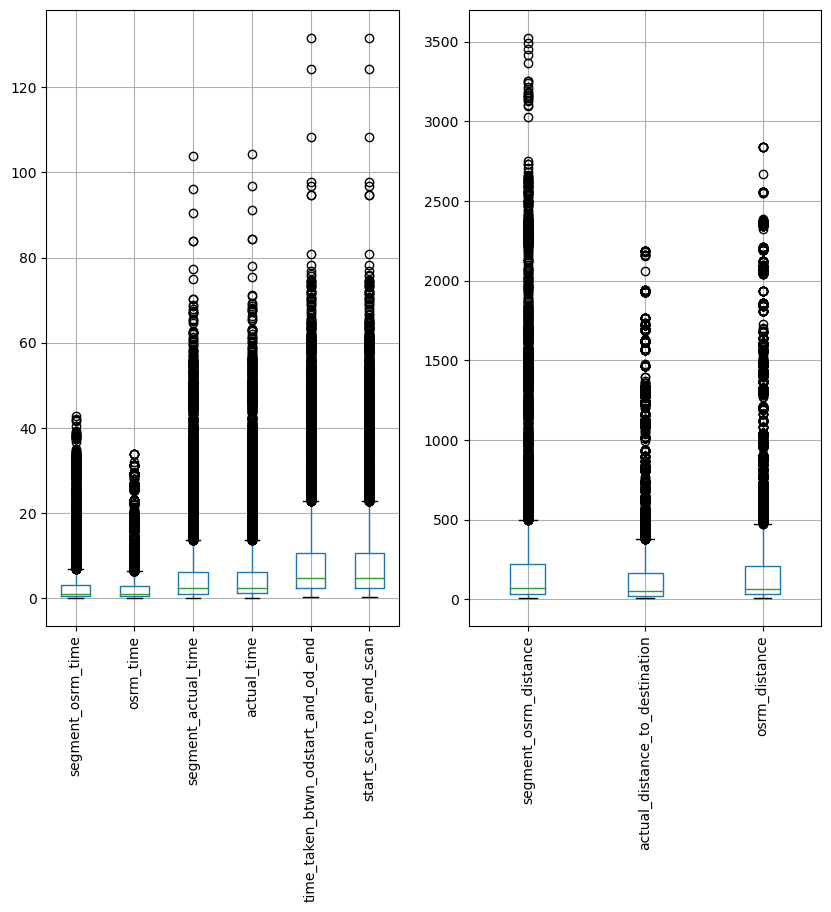

In [ ]:
plt.figure(figsize = (10,8))
plt.subplot(121)
trip_records[['segment_osrm_time', 'osrm_time',
       'segment_actual_time', 'actual_time',
       'time_taken_btwn_odstart_and_od_end', 'start_scan_to_end_scan']].boxplot()
plt.xticks(rotation =90)
plt.subplot(122)
trip_records[['segment_osrm_distance', 'actual_distance_to_destination',
       'osrm_distance']].boxplot()
plt.xticks(rotation =90)
plt.show()

## Handle the outliers using the IQR method

In [ ]:
outlier_IQR  = trip_records.copy()

In [ ]:
outlier_IQR_num = outlier_IQR[['segment_osrm_time', 'osrm_time',
       'segment_actual_time', 'actual_time',
       'time_taken_btwn_odstart_and_od_end', 'start_scan_to_end_scan',
        'segment_osrm_distance', 'actual_distance_to_destination',
        'osrm_distance']]

In [ ]:
trip_records_IQR = trip_records.loc[outlier_IQR_num[(np.abs(stats.zscore(outlier_IQR_num)) < 3).all(axis=1)].index]
trip_records_IQR

,trip_uuid,route_type,source_city,destination_city,source_city_state,destination_city_state,source_state,destination_state,segment_osrm_time,osrm_time,segment_actual_time,actual_time,time_taken_btwn_odstart_and_od_end,start_scan_to_end_scan,segment_osrm_distance,actual_distance_to_destination,osrm_distance,route_schedule_uuid
0,trip-153671041653548748,F,Bhopal Kanpur,Kanpur Gurgaon,Bhopal Madhya Pradesh Kanpur Uttar Pradesh,Kanpur Uttar Pradesh Gurgaon Haryana,Madhya Pradesh Uttar Pradesh,Uttar Pradesh Haryana,16.800000,12.383333,25.800000,26.033333,37.668497,37.650000,1320.4733,824.732854,991.3523,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...
1,trip-153671042288605164,C,Tumkur Doddablpur,Doddablpur Chikblapur,Tumkur Karnataka Doddablpur Karnataka,Doddablpur Karnataka Chikblapur Karnataka,Karnataka,Karnataka,1.083333,1.133333,2.350000,2.383333,3.026865,3.000000,84.1894,73.186911,85.1110,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...
3,trip-153671046011330457,C,Mumbai,Mumbai,Mumbai Hub Maharashtra,Mumbai Maharashtra,Hub Maharashtra,Maharashtra,0.266667,0.250000,0.983333,0.983333,1.674916,1.666667,19.8766,17.175274,19.6800,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...
4,trip-153671052974046625,F,Bellary Hospet Sandur,Hospet Sandur Bellary,Bellary Karnataka Hospet Karnataka Sandur Karn...,Hospet Karnataka Sandur Karnataka Bellary Karn...,Karnataka,Karnataka,1.916667,1.950000,5.666667,5.683333,11.972484,11.950000,146.7919,127.448500,146.7918,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...
5,trip-153671055416136166,C,Chennai,Chennai,Chennai Tamil Nadu,Chennai Tamil Nadu,Tamil Nadu,Tamil Nadu,0.383333,0.383333,1.000000,1.016667,3.174797,3.150000,28.0647,24.597048,28.0647,thanos::sroute:9bf03170-d0a2-4a3f-aa4d-9aaab3d...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14812,trip-153861095625827784,C,Chandigarh,Zirakpur Chandigarh,Chandigarh Punjab Chandigarh Chandigarh,Zirakpur Punjab Chandigarh Punjab,Punjab Chandigarh,Punjab,1.033333,1.033333,1.366667,1.383333,4.300482,4.283333,64.8551,57.762332,73.4630,thanos::sroute:8a120994-f577-4491-9e4b-b7e4a14...
14813,trip-153861104386292051,C,FBD,Faridabad,FBD Haryana,Faridabad Haryana,Haryana,Haryana,0.183333,0.200000,0.350000,0.350000,1.009842,1.000000,16.0883,15.513784,16.0882,thanos::sroute:b30e1ec3-3bfa-4bd2-a7fb-3b75769...
14814,trip-153861106442901555,C,Kanpur,Kanpur,Kanpur Uttar Pradesh,Kanpur Uttar Pradesh,Uttar Pradesh,Uttar Pradesh,1.466667,0.900000,4.683333,4.700000,7.035331,7.016667,104.8866,38.684839,63.2841,thanos::sroute:5609c268-e436-4e0a-8180-3db4a74...
14815,trip-153861115439069069,C,Tirunelveli Eral Tirchchndr Thisayanvilai Peik...,Eral Tirchchndr Thisayanvilai Peikulam Tirunel...,Tirunelveli Tamil Nadu Eral Tamil Nadu Tirchch...,Eral Tamil Nadu Tirchchndr Tamil Nadu Thisayan...,Tamil Nadu,Tamil Nadu,3.683333,3.066667,4.300000,4.400000,5.808548,5.783333,223.5324,134.723836,177.6635,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...


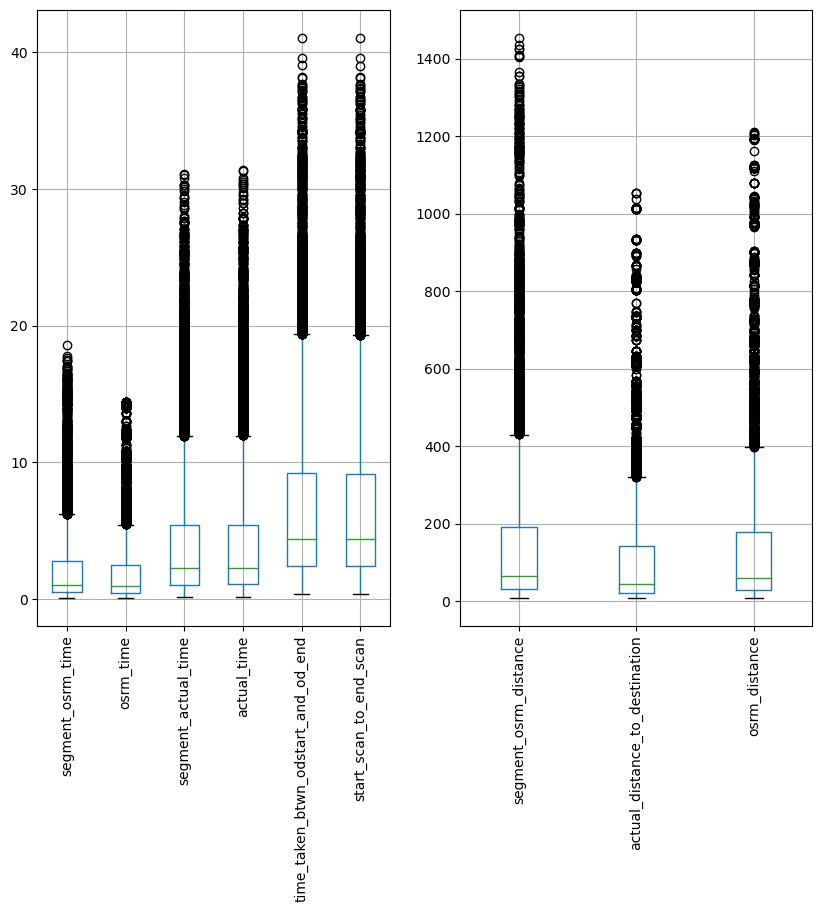

In [ ]:
plt.figure(figsize = (10,8))
plt.subplot(121)
trip_records_IQR[['segment_osrm_time', 'osrm_time',
       'segment_actual_time', 'actual_time',
       'time_taken_btwn_odstart_and_od_end', 'start_scan_to_end_scan']].boxplot()
plt.xticks(rotation =90)
plt.subplot(122)
trip_records_IQR[['segment_osrm_distance', 'actual_distance_to_destination',
       'osrm_distance']].boxplot()
plt.xticks(rotation =90)
plt.show()

- Plots with outliers treated with IQR

## One-hot encoding (OHE) of categorical variables

In [ ]:
trip_records_IQR["destination_source_locations"] = trip_records_IQR["source_city_state"]+" "+trip_records_IQR["destination_city_state"]
trip_records_IQR.drop(["source_city_state","destination_city_state"],axis = 1,inplace=True)

In [ ]:
trip_records_IQR.head()

,trip_uuid,route_type,source_city,destination_city,source_state,destination_state,segment_osrm_time,osrm_time,segment_actual_time,actual_time,time_taken_btwn_odstart_and_od_end,start_scan_to_end_scan,segment_osrm_distance,actual_distance_to_destination,osrm_distance,route_schedule_uuid,destination_source_locations
0,trip-153671041653548748,F,Bhopal Kanpur,Kanpur Gurgaon,Madhya Pradesh Uttar Pradesh,Uttar Pradesh Haryana,16.800000,12.383333,25.800000,26.033333,37.668497,37.650000,1320.4733,824.732854,991.3523,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,Bhopal Madhya Pradesh Kanpur Uttar Pradesh Kan...
1,trip-153671042288605164,C,Tumkur Doddablpur,Doddablpur Chikblapur,Karnataka,Karnataka,1.083333,1.133333,2.350000,2.383333,3.026865,3.000000,84.1894,73.186911,85.1110,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Tumkur Karnataka Doddablpur Karnataka Doddablp...
3,trip-153671046011330457,C,Mumbai,Mumbai,Hub Maharashtra,Maharashtra,0.266667,0.250000,0.983333,0.983333,1.674916,1.666667,19.8766,17.175274,19.6800,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Mumbai Hub Maharashtra Mumbai Maharashtra
4,trip-153671052974046625,F,Bellary Hospet Sandur,Hospet Sandur Bellary,Karnataka,Karnataka,1.916667,1.950000,5.666667,5.683333,11.972484,11.950000,146.7919,127.448500,146.7918,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,Bellary Karnataka Hospet Karnataka Sandur Karn...
5,trip-153671055416136166,C,Chennai,Chennai,Tamil Nadu,Tamil Nadu,0.383333,0.383333,1.000000,1.016667,3.174797,3.150000,28.0647,24.597048,28.0647,thanos::sroute:9bf03170-d0a2-4a3f-aa4d-9aaab3d...,Chennai Tamil Nadu Chennai Tamil Nadu


In [ ]:
sc_dc = trip_records_IQR.groupby(["destination_source_locations"])["trip_uuid"].nunique().sort_values(ascending= False).reset_index()

In [ ]:
sc_dc.head()

,destination_source_locations,trip_uuid
0,Bengaluru Karnataka Bengaluru Karnataka,1316
1,Bhiwandi Maharashtra Mumbai Maharashtra,437
2,Mumbai Maharashtra Mumbai Maharashtra,330
3,Hyderabad Telangana Hyderabad Telangana,308
4,Gurgaon Haryana Delhi Delhi,237


In [ ]:
def get_cat(H):
    if 0 <= H <= 50:
        return "Category 7"
    elif 51 <= H <= 100:
        return "Category 6"
    elif 101 <= H <= 200:
        return "Category 5"
    elif 201 <= H <= 300:
        return "Category 4"
    elif 301 <= H <= 400:
        return "Category 3"
    elif 401 <= H <= 500:
        return "Category 2"
    else:
        return "Category 1"

In [ ]:
sc_dc["city"]  = pd.Series(map(get_cat,sc_dc["trip_uuid"]))
trip_records_for_encoding = sc_dc.merge(trip_records_IQR,
            on="destination_source_locations")
trip_records_for_encoding.drop(["destination_source_locations","trip_uuid_x"],axis = 1,inplace=True)
trip_records_for_encoding.drop(["trip_uuid_y"],axis = 1,inplace=True)
# trip_records_for_encoding.sample(15)
encoded_data = pd.get_dummies(trip_records_for_encoding,
             columns=["route_type","city"] )
encoded_data

,source_city,destination_city,source_state,destination_state,segment_osrm_time,osrm_time,segment_actual_time,actual_time,time_taken_btwn_odstart_and_od_end,start_scan_to_end_scan,...,route_schedule_uuid,route_type_C,route_type_F,city_Category 1,city_Category 2,city_Category 3,city_Category 4,city_Category 5,city_Category 6,city_Category 7
0,Bengaluru,Bengaluru,Karnataka,Karnataka,1.383333,0.950000,3.183333,3.233333,4.407028,4.400000,...,thanos::sroute:09b4c49e-0e89-40b6-99b3-e671400...,1,0,1,0,0,0,0,0,0
1,Bengaluru,Bengaluru,Karnataka,Karnataka,1.150000,0.883333,2.666667,2.700000,4.063014,4.050000,...,thanos::sroute:500aa87c-3d54-4159-a296-0b93c15...,1,0,1,0,0,0,0,0,0
2,Bengaluru,Bengaluru,Karnataka,Karnataka,1.183333,0.966667,3.316667,3.333333,4.076829,4.066667,...,thanos::sroute:16a02d06-e6b6-443b-bd98-0a9e4f4...,1,0,1,0,0,0,0,0,0
3,Bengaluru,Bengaluru,Karnataka,Karnataka,0.700000,0.733333,1.316667,1.316667,4.915934,4.900000,...,thanos::sroute:5ffb9921-f943-446e-8796-0b06aa2...,1,0,1,0,0,0,0,0,0
4,Bengaluru,Bengaluru,Karnataka,Karnataka,0.783333,0.666667,1.750000,1.766667,3.248617,3.233333,...,thanos::sroute:39928fa7-4ce7-4b78-8e00-c56e31d...,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14155,Hyderabad Kadthal Kalwakurthy Devarakonda,Kadthal Kalwakurthy Devarakonda Haliya,Telangana,Telangana,1.966667,1.983333,3.233333,3.250000,6.215731,6.183333,...,thanos::sroute:36a3bd62-25dc-44c9-957b-8bcf117...,0,1,0,0,0,0,0,0,1
14156,Hyderabad Kadthal,Kadthal Devarakonda,Telangana,Telangana,1.483333,1.433333,2.716667,2.750000,5.625200,5.600000,...,thanos::sroute:36a3bd62-25dc-44c9-957b-8bcf117...,0,1,0,0,0,0,0,0,1
14157,Hyderabad Kadthal Haliya,Kadthal Kalwakurthy Hyderabad,Telangana,Telangana,2.916667,2.866667,4.950000,4.983333,7.741082,7.716667,...,thanos::sroute:36a3bd62-25dc-44c9-957b-8bcf117...,0,1,0,0,0,0,0,0,1
14158,Hyderabad Kadthal Haliya,Kadthal Devarakonda Hyderabad,Telangana,Telangana,3.383333,3.333333,10.950000,10.966667,13.940494,13.916667,...,thanos::sroute:36a3bd62-25dc-44c9-957b-8bcf117...,0,1,0,0,0,0,0,0,1


## Normalize/ Standardize the numerical features using MinMaxScaler or StandardScaler.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

scaler = StandardScaler()
std_data = scaler.fit_transform(encoded_data[['segment_osrm_time',
 'osrm_time',
 'segment_actual_time',
 'actual_time',
 'time_taken_btwn_odstart_and_od_end',
 'start_scan_to_end_scan',
 'segment_osrm_distance',
 'actual_distance_to_destination',
 'osrm_distance']])
std_data = pd.DataFrame(std_data, columns=['segment_osrm_time',
 'osrm_time',
 'segment_actual_time',
 'actual_time',
 'time_taken_btwn_odstart_and_od_end',
 'start_scan_to_end_scan',
 'segment_osrm_distance',
 'actual_distance_to_destination',
 'osrm_distance'])
std_data.head()

,segment_osrm_time,osrm_time,segment_actual_time,actual_time,time_taken_btwn_odstart_and_od_end,start_scan_to_end_scan,segment_osrm_distance,actual_distance_to_destination,osrm_distance
0,-0.269133,-0.409683,-0.220225,-0.214843,-0.394178,-0.391956,-0.362747,-0.450888,-0.468190
1,-0.359785,-0.438916,-0.324535,-0.321822,-0.445632,-0.444397,-0.448864,-0.542288,-0.521446
2,-0.346835,-0.402374,-0.193306,-0.194785,-0.443566,-0.441900,-0.416136,-0.451494,-0.414618
3,-0.534615,-0.504692,-0.597087,-0.599297,-0.318061,-0.317039,-0.536543,-0.516196,-0.529763
4,-0.502239,-0.533926,-0.509601,-0.509034,-0.567441,-0.566761,-0.549293,-0.536356,-0.565995


In [ ]:
scaler = MinMaxScaler()
MinMax_data = scaler.fit_transform(encoded_data[['segment_osrm_time','osrm_time','segment_actual_time','actual_time',
 'time_taken_btwn_odstart_and_od_end','start_scan_to_end_scan','segment_osrm_distance','actual_distance_to_destination',
 'osrm_distance']])
MinMax_data = pd.DataFrame(MinMax_data,columns=['segment_osrm_time',
 'osrm_time','segment_actual_time','actual_time','time_taken_btwn_odstart_and_od_end','start_scan_to_end_scan',
 'segment_osrm_distance','actual_distance_to_destination','osrm_distance'])
MinMax_data.head()

,segment_osrm_time,osrm_time,segment_actual_time,actual_time,time_taken_btwn_odstart_and_od_end,start_scan_to_end_scan,segment_osrm_distance,actual_distance_to_destination,osrm_distance
0,0.069369,0.059302,0.098113,0.098719,0.098792,0.098811,0.046420,0.031804,0.036747
1,0.056757,0.054651,0.081402,0.081644,0.090329,0.090201,0.034665,0.018854,0.028743
2,0.058559,0.060465,0.102426,0.101921,0.090669,0.090611,0.039132,0.031718,0.044799
3,0.032432,0.044186,0.037736,0.037353,0.111311,0.111111,0.022697,0.022551,0.027493
4,0.036937,0.039535,0.051752,0.051761,0.070296,0.070111,0.020957,0.019694,0.022047


In [ ]:
std_data

,segment_osrm_time,osrm_time,segment_actual_time,actual_time,time_taken_btwn_odstart_and_od_end,start_scan_to_end_scan,segment_osrm_distance,actual_distance_to_destination,osrm_distance
0,-0.269133,-0.409683,-0.220225,-0.214843,-0.394178,-0.391956,-0.362747,-0.450888,-0.468190
1,-0.359785,-0.438916,-0.324535,-0.321822,-0.445632,-0.444397,-0.448864,-0.542288,-0.521446
2,-0.346835,-0.402374,-0.193306,-0.194785,-0.443566,-0.441900,-0.416136,-0.451494,-0.414618
3,-0.534615,-0.504692,-0.597087,-0.599297,-0.318061,-0.317039,-0.536543,-0.516196,-0.529763
4,-0.502239,-0.533926,-0.509601,-0.509034,-0.567441,-0.566761,-0.549293,-0.536356,-0.565995
...,...,...,...,...,...,...,...,...,...
14155,-0.042502,0.043440,-0.210131,-0.211500,-0.123651,-0.124754,0.107675,0.278861,0.169418
14156,-0.230282,-0.197738,-0.314441,-0.311792,-0.211977,-0.212156,-0.123317,-0.165131,-0.097018
14157,0.326583,0.430787,0.136448,0.136179,0.104495,0.104990,0.360386,0.434538,0.512552
14158,0.507888,0.635424,1.347789,1.336342,1.031740,1.033953,0.662356,0.578210,0.760187


## EDA Insights from preprocessed data

### 1. Top 20 source and destination cities wihc have high freqency of trips in between


In [ ]:
Number_of_trips_between_cities = delhivery_data.groupby(["source_city_state",
                                               "destination_city_state"])["trip_uuid"].nunique().sort_values(ascending=False).reset_index()
Number_of_trips_between_cities.head(20)

,source_city_state,destination_city_state,trip_uuid
0,Bengaluru Karnataka,Bengaluru Karnataka,1369
1,Bhiwandi Maharashtra,Mumbai Maharashtra,512
2,Mumbai Maharashtra,Mumbai Maharashtra,361
3,Hyderabad Telangana,Hyderabad Telangana,308
4,Mumbai Maharashtra,Bhiwandi Maharashtra,282
5,Delhi Delhi,Gurgaon Haryana,248
6,Gurgaon Haryana,Delhi Delhi,237
7,Mumbai Hub Maharashtra,Mumbai Maharashtra,227
8,Chennai Tamil Nadu,Chennai Tamil Nadu,205
9,MAA Tamil Nadu,Chennai Tamil Nadu,204


- From above table, we can observe that Mumbai Maharashtra ,Delhi ,Gurgaon(Haryana),Bengaluru Karnataka ,Hyderabad Telangana,Chennai Tamil Nadu,Ahmedabad Gujarat,Pune Maharashtra,Chandigarh Chandigarh and Kolkata West Bengal are some cities have higest amount of trips happening states with in the city

### 2. highest number of Trips happening between/within two states

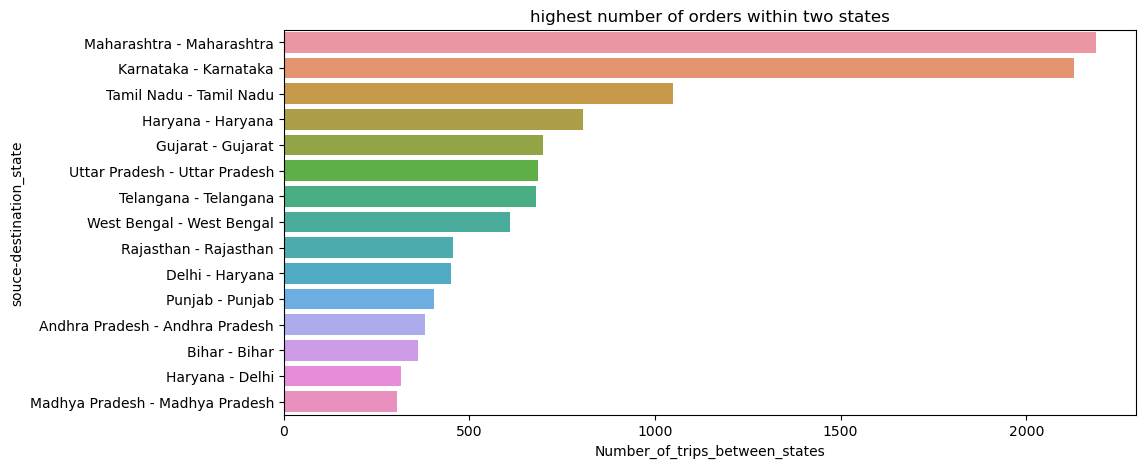

In [ ]:
highest_order_between_states = delhivery_data.groupby(["source_state",
                                             "destination_state"])["trip_uuid"].nunique().sort_values(ascending=False).reset_index()
HOBS  = highest_order_between_states.head(15)
HOBS["souce-destination"] = HOBS["source_state"] + " - " + HOBS["destination_state"]
HOBS.drop(["source_state","destination_state"],axis = 1, inplace=True)
HOBS.columns = ["Number_of_trips_between_states","souce-destination_state"]

plt.figure(figsize=(11,5))
sns.barplot(y = HOBS["souce-destination_state"],
           x = HOBS["Number_of_trips_between_states"],)
plt.title("highest number of orders within two states")
plt.show()

- Maharashtra has highest number of orders within two states followed by Karnataka and Tamil nadu

### Top 20 warehouses with heavy traffic

In [ ]:
destination_traffic = delhivery_data.groupby(["destination_city_state"])["trip_uuid"].nunique().reset_index()
source_traffic = delhivery_data.groupby(["source_city_state"])["trip_uuid"].nunique().reset_index()
transactions = source_traffic.merge(destination_traffic,
                               left_on="source_city_state"
                               ,right_on="destination_city_state")
transactions.columns = ["source_city_state","#Trips_s","destination_city_state","#Trips_d"]
transactions["TripsTraffic"] = transactions["#Trips_s"]+transactions["#Trips_d"]
transactions.drop(["#Trips_s","#Trips_d","destination_city_state"],axis = 1,inplace=True)
transactions.columns = ["Warehouse_City(Junction)","TripsTraffic"]

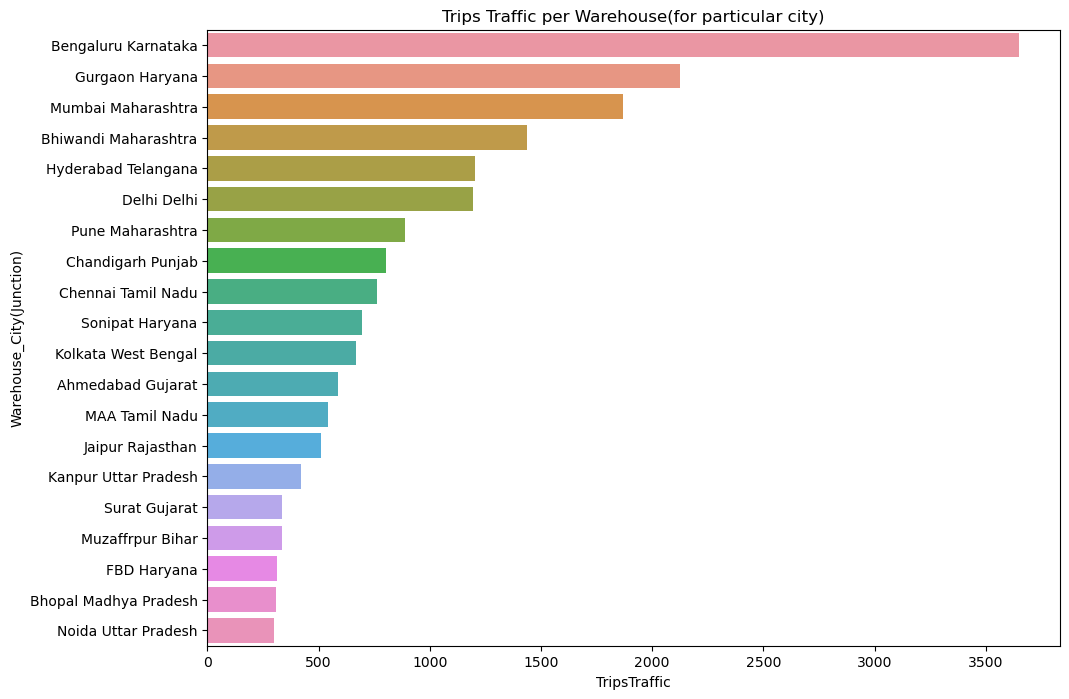

In [ ]:
T = transactions.sort_values(by=["TripsTraffic"],ascending=False).head(20)
plt.figure(figsize=(11,8))
sns.barplot(y = T["Warehouse_City(Junction)"],
           x = T["TripsTraffic"])
plt.title("Trips Traffic per Warehouse(for particular city)")
plt.show()

- Bengaluru warehouse has most traffic followed by Gurgaon,Mumbai and Bhiwandi

## Recommendations:

- Based on the analysis, it is recommended to use small vehicles for deliveries within the city to reduce delivery time, and heavy trucks for long-distance trips or heavy loads. By implementing this strategy, we can optimize delivery time and increase revenue according to our requirements.

- Enhancing connectivity in tier 2 and tier 3 cities, along with professional partnerships with various e-commerce giants, can boost both revenue and our reputation for cross-border connectivity. Additionally, we should focus on optimizing scanning times at both the start and end of the delivery process to align with OSRM estimated delivery times.

- It is crucial to revisit the information fed into the routing engine for trip planning and address any discrepancies with transporters to ensure the routing engine is configured for optimal results.

- The North, South, and West zones have significant order traffic, but our presence is smaller in the Central, Eastern, and North-Eastern zones. While two months of data may not be conclusive, it is worth investigating and increasing our presence in these regions.

- From a state perspective, Maharashtra and Karnataka have the highest traffic. This indicates a need to prioritize resource planning in these states, especially during festive seasons.

## EDA Analysis results


- We can observe that cities like Mumbai, Maharashtra; Delhi; Gurgaon, Haryana; Bengaluru, Karnataka; Hyderabad, Telangana; Chennai, Tamil Nadu; Ahmedabad, Gujarat; Pune, Maharashtra; Chandigarh; and Kolkata, West Bengal, have the highest number of trips within their respective states.

- When considering unequal source and destination states, the cities with the highest number of trips between them are: Delhi to Gurgaon, Gurgaon to Bengaluru, Bhiwandi/Mumbai to Pune, Maharashtra, and Sonipat to Gurgaon, Haryana.

- It has also been observed that numerous deliveries are made to airports, such as: Chennai to Chennai International Airport (MAA), Pune to Pune Airport (PNQ), Kolkata to Kolkata International Airport (CCU), and Bengaluru to Bengaluru International Airport (BLR).

- From the bar charts and calculated tables in the analysis, we can see that the highest number of trips occur within particular cities. In terms of average distance between destinations, the longest routes are from Guwahati to Mumbai, Bengaluru to Chandigarh, Bengaluru to Delhi, and Bengaluru to Gurgaon.

## Hypothesis Testing results

Based on the results from a two-sample t-test, we can conclude the following:

- The average time taken between the order start and order end is equal to the average time from start scan to end scan for the population.
- The population's average actual time is less than the population's average start scan to end scan time.
- The population mean for actual time taken to complete delivery and the population mean time taken between order start and order end are not the same.
- The mean of actual time is higher than the mean of the OSRM estimated time for delivery.
- The population average for the actual time taken to complete the delivery trip and the segment actual time are the same.
- The average OSRM distance for the population is less than the average segment OSRM distance.
- The population OSRM estimated distance is higher than the actual distance from the source to the destination warehouse.